In [143]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import seaborn as sns
import pandas_profiling as pp
from pandas_profiling import ProfileReport


In [8]:
#Q1
ins=pd.read_csv("insurance.csv")
ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [12]:
#Q1
ins.target = ins["charges"]
X = ins.drop("charges",1)   #Feature Matrix
y = ins["charges"]          #Target Variable
ins.head()

<ipython-input-12-1a6ccfa400c2>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  ins.target = ins["charges"]


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [20]:
#Q2
# grouping the dataframe by region
ins.groupby(['region']).count()


,age,sex,bmi,children,smoker,charges
region,,,,,,
northeast,324,324,324,324,324,324
northwest,325,325,325,325,325,325
southeast,364,364,364,364,364,364
southwest,325,325,325,325,325,325


In [30]:
#A series showing the total number of individuals of each region.
ins_region_stats=ins["region"].value_counts()
ins_region_stats

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [31]:
#converting the series into a data frame and naming the columns
ins_region_stats_hist = pd.DataFrame(ins_region_stats).reset_index()
ins_region_stats_hist.columns = ['Region', 'Count']
ins_region_stats_hist


,Region,Count
0,southeast,364
1,southwest,325
2,northwest,325
3,northeast,324


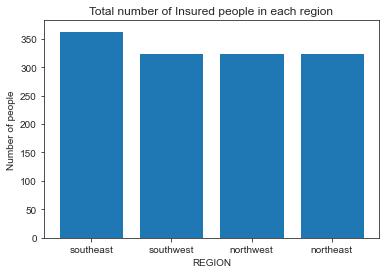

In [33]:
#Bar graph of total number of insured people based on region.
plt.bar(ins_region_stats_hist["Region"], ins_region_stats_hist["Count"])
plt.xlabel("REGION")
plt.ylabel("Number of people")
plt.title("Total number of Insured people in each region")
plt.show()

The total number of indivuduals in each region, Southeast woth the highest of 364 and northeast with the lowest of 324

In [23]:
# The number of females to males
ins["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [25]:
#The number of smokers to non-smokers
ins["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

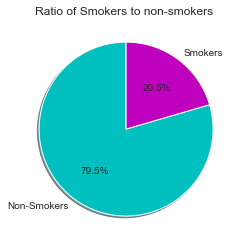

In [42]:
slices = [1064,274]
smoke = ['Non-Smokers','Smokers',]
cols = ['c','m']
plt.pie(slices,
        labels=smoke,
        colors=cols,
        startangle=90,
        shadow= True,
        explode=(0,0),
        autopct='%1.1f%%')
plt.title('Ratio of Smokers to non-smokers ')
plt.show()


79.5% of the insured individuals are non-smokers and 20.5% are smokers.

In [35]:
# The maximum age of the insured individuals is 64 years
ins["age"].max()

64

In [36]:
#The lowest age of the insured individuals is 18 years
ins["age"].min()

18

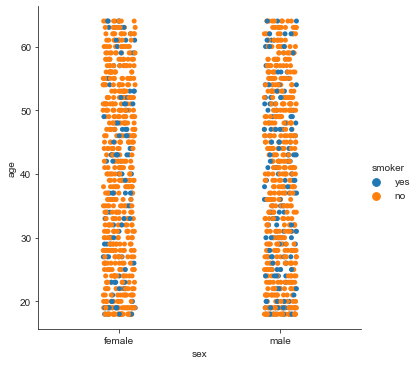

In [43]:
#Strip plot of age to smokers or non-smokers
sns.catplot(x="sex", y="age", hue="smoker", data=ins)

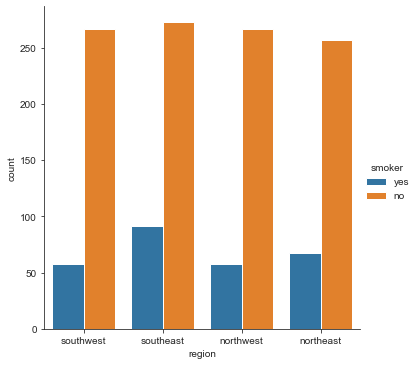

In [127]:
#Bar Braph of smokers and non-smokers according to region
sns.catplot(x="region",hue="smoker", data=ins, kind="count")

Bar Braph of smokers and non-smokers according to region

{'whiskers': [<matplotlib.lines.Line2D at 0x17118ae16a0>,
 'caps': [<matplotlib.lines.Line2D at 0x17118bd2be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17118ae12e0>],
 'medians': [<matplotlib.lines.Line2D at 0x17118b6e100>],
 'fliers': [<matplotlib.lines.Line2D at 0x17118b6e760>],
 'means': []}

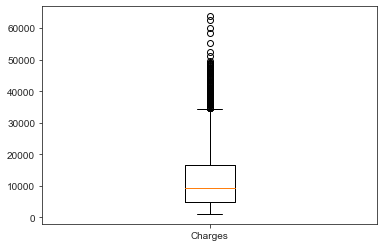

In [44]:
#Box plot of the charges.
plt.boxplot([ins.charges],labels=['Charges'])

Text(0, 0.5, 'Number of people')

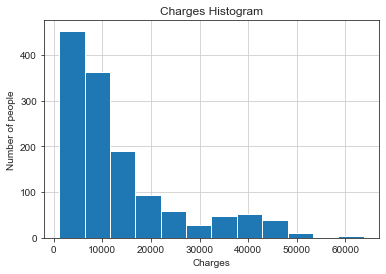

In [49]:
#Histogram of charges 
hist_plot_charges= ins["charges"].hist(bins=12)
hist_plot_charges.set_title("Charges Histogram")
hist_plot_charges.set_xlabel("Charges")
hist_plot_charges.set_ylabel("Number of people")

Most of the people pay below 10000 and a small group pays 60000 for their insuarance 

Text(0, 0.5, 'Number of People')

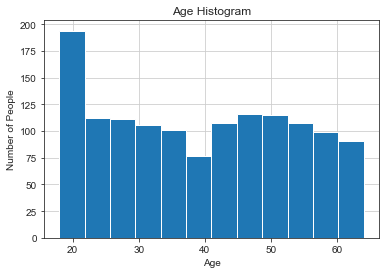

In [48]:
#Q3
#Histogram of the Age distribution of the customers
hist_plot_age= ins["age"].hist(bins=12)
hist_plot_age.set_title("Age Histogram")
hist_plot_age.set_xlabel("Age")
hist_plot_age.set_ylabel("Number of People")

Highest number of the customers are between 18 to 22 years old
We have fewer peopl at the late 30s , that is from 38 to 41 years taht where we ahve the least number of people

In [50]:
#Q4
#list of all columns names
ins.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [51]:
#Data types of each column
ins.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [52]:
#List of all numerical columns
ins.select_dtypes(include=np.number).columns.tolist()

['age', 'bmi', 'children', 'charges']

In [63]:
#Dataframe of the numerical columns only
ins_num= ins[['age','bmi','children','charges']]
ins_num

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [64]:
#Dataframe of numerical continuous columns
numerical_continuous=ins_num[['bmi','charges']]
numerical_continuous

,bmi,charges
0,27.900,16884.92400
1,33.770,1725.55230
2,33.000,4449.46200
3,22.705,21984.47061
4,28.880,3866.85520
...,...,...
1333,30.970,10600.54830
1334,31.920,2205.98080
1335,36.850,1629.83350
1336,25.800,2007.94500


In [65]:
#Dataframe of numerical discrete columns
numerical_discrete=ins_num[['age','children']]
numerical_discrete

,age,children
0,19,0
1,18,1
2,28,3
3,33,0
4,32,0
...,...,...
1333,50,3
1334,18,0
1335,18,0
1336,21,0


Text(0, 0.5, 'count')

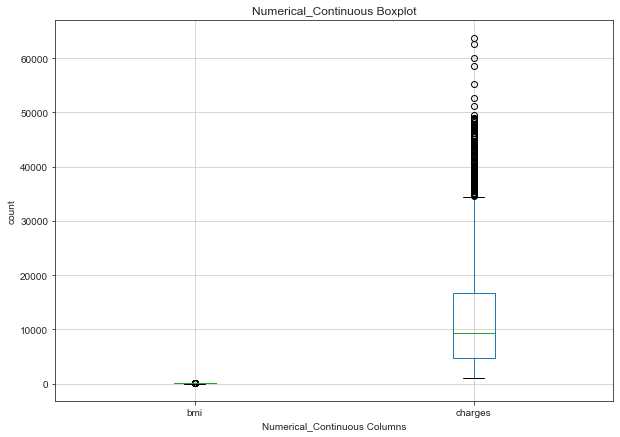

In [67]:
#Q5
# Visualization of outliers
plt.figure(figsize = (10,7))
numerical_continuous.boxplot()
plt.title("Numerical_Continuous Boxplot")
plt.xlabel('Numerical_Continuous Columns')
plt.ylabel('count')

Outliers do exist on the charges column.


In [93]:
#Dataframe for charges only
numerical_continuous_charges=numerical_continuous['charges']
numerical_continuous_charges=pd.DataFrame(data=numerical_continuous_charges)
numerical_continuous_charges

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [99]:
#Zscore
#Dataframe pf charges plus its zscore
numerical_continuous_charges['zscore']=(numerical_continuous_charges - numerical_continuous_charges.mean())/numerical_continuous_charges.std()
numerical_continuous_charges

,charges,zscore
0,16884.92400,0.298472
1,1725.55230,-0.953333
2,4449.46200,-0.728402
3,21984.47061,0.719574
4,3866.85520,-0.776512
...,...,...
1333,10600.54830,-0.220468
1334,2205.98080,-0.913661
1335,1629.83350,-0.961237
1336,2007.94500,-0.930014


In [103]:
numerical_continuous_charges.zscore.min()

-1.0031822537315649

In [95]:
#Statistical values for the charges column
numerical_continuous_charges.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [112]:
#Using a threshold of 25000, I will remove all data with zscores of above 0.97
numerical_continuous_charges_clean= numerical_continuous_charges[numerical_continuous_charges['zscore']< 0.97]
numerical_continuous_charges_clean

,charges,zscore
0,16884.92400,0.298472
1,1725.55230,-0.953333
2,4449.46200,-0.728402
3,21984.47061,0.719574
4,3866.85520,-0.776512
...,...,...
1332,11411.68500,-0.153488
1333,10600.54830,-0.220468
1334,2205.98080,-0.913661
1335,1629.83350,-0.961237


Text(0, 0.5, 'Amount')

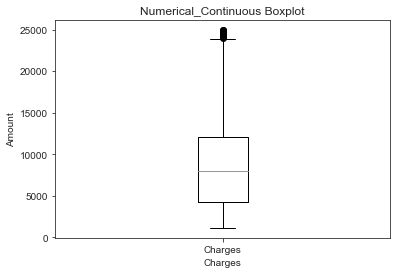

In [113]:
#Q6 Visualization of the cleansed data, with outliers removed
plt.boxplot([numerical_continuous_charges_clean.charges],labels=['Charges'])
plt.title("Numerical_Continuous Boxplot")
plt.xlabel('Charges')
plt.ylabel('Amount')

Visualization of the cleansed data, with outliers removed

In [119]:
#Q7 Dataframe of categorical columns
ins_cat=ins[['sex','smoker','region']]
ins_cat           

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


Text(0, 0.5, 'count')

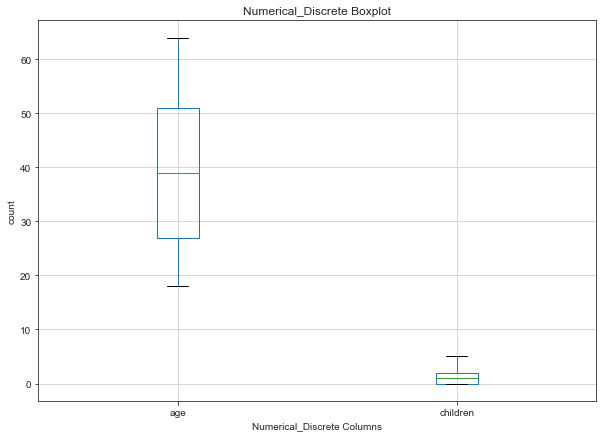

In [120]:
#Q8
# Visualization of outliers for Numerical discrete columns or features
plt.figure(figsize = (10,7))
numerical_discrete.boxplot()
plt.title("Numerical_Discrete Boxplot")
plt.xlabel('Numerical_Discrete Columns')
plt.ylabel('count')

There are no outliers on the numerical discrete columns as shown by the above boxplot

Visualization of outliers for Numerical discrete columns or features 

<AxesSubplot:xlabel='charges', ylabel='age'>

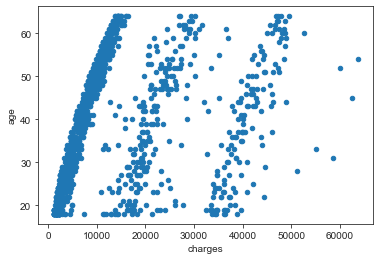

In [133]:
#Scatter Plot of age vs charges
ins.plot(x="charges", y="age", kind= "scatter")

In [135]:
fig = ff.create_scatterplotmatrix(ins, diag='box', index='index',colormap='Portland',
                                  colormap_type='cat',
                                  height=700, width=700)
fig = go.Figure(fig)
#fig = go.Figure(dict(data = data, layout = layout))
fig.show()


NameError: name 'ff' is not defined

In [139]:
#Q9
# Label encoder on the column/feature sex
from sklearn.preprocessing import LabelEncoder
lblencode = LabelEncoder()
ins_cat["sex"] = lblencode.fit_transform(ins_cat["sex"])
ins_cat

<ipython-input-139-1279350b7979>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ins_cat["sex"] = lblencode.fit_transform(ins_cat["sex"])


,sex,smoker,region
0,0,yes,southwest
1,1,no,southeast
2,1,no,southeast
3,1,no,northwest
4,1,no,northwest
...,...,...,...
1333,1,no,northwest
1334,0,no,northeast
1335,0,no,southeast
1336,0,no,southwest


Label encoder on the feature sex

In [157]:
# Label encoder on the column/feature smoker
from sklearn.preprocessing import LabelEncoder
lblencode = LabelEncoder()
ins_cat["smoker"] = lblencode.fit_transform(ins_cat["smoker"])
ins_cat

<ipython-input-157-532fe1433cce>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ins_cat["smoker"] = lblencode.fit_transform(ins_cat["smoker"])


,sex,smoker,region
0,0,1,southwest
1,1,0,southeast
2,1,0,southeast
3,1,0,northwest
4,1,0,northwest
...,...,...,...
1333,1,0,northwest
1334,0,0,northeast
1335,0,0,southeast
1336,0,0,southwest


In [158]:
#Drop region feature
ins_cat_drop_region=ins_cat.drop(["region"],axis=1)
ins_cat_drop_region

,sex,smoker
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1333,1,0
1334,0,0
1335,0,0
1336,0,0


Labelencorder on smoker

In [136]:
#Separating the target to the rest of the features
#Q10
ins.target = ins["charges"]
X = ins.drop("charges",1)   #Feature Matrix
y = ins["charges"]          #Target Variable
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [154]:
#Drop columns sex,region,smoker
ins_numerical_columns=ins.drop(["sex","region","smoker"], axis=1)
ins_numerical_columns

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [163]:
#concat 2 data frames and drop a column
ins_filter=pd.merge(ins_numerical_columns.reset_index(),ins_cat_drop_region.reset_index())
ins_filter= ins_filter.drop(["index"],axis = 1)
ins_filter

,age,bmi,children,charges,sex,smoker
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


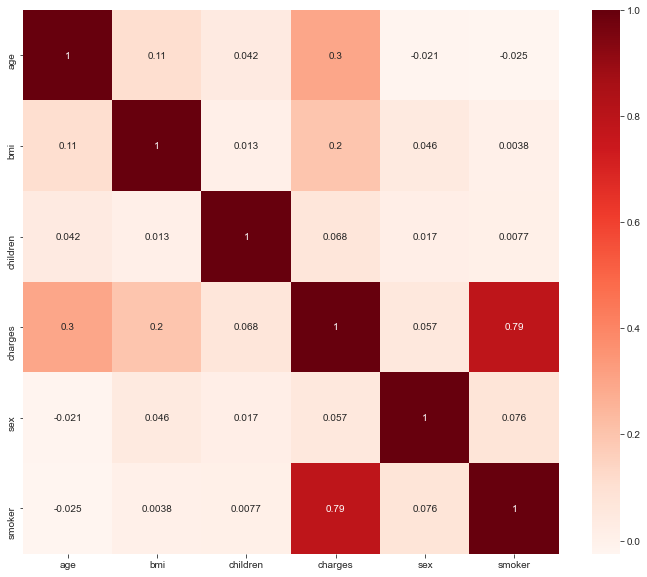

In [164]:
#Using Pearson Correlation on the ins_filter dataframe
plt.figure(figsize=(12,10))
cor = ins_filter.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [166]:
#Correlation with output variable
cor_target = abs(cor["charges"])
cor_target

age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
sex         0.057292
smoker      0.787251
Name: charges, dtype: float64

In [167]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

charges    1.000000
smoker     0.787251
Name: charges, dtype: float64

AS shown above through the pearson correlation , ONLY feature Smoker is correlated to the target "charges"

In [125]:
#Pandas Profiling for the dataframe ins
pp.ProfileReport(ins)